La base de datos MNIST contiene un conjunto de 70,000 imágenes en blanco y negro de dígitos del 0 al 9 escritos a mano. Estas imágenes se recopilaron de formularios escritos a mano por empleados de la Oficina del Censo de los Estados Unidos y estudiantes universitarios.
    
* El objetivo de esta actividad es crear un algoritmo basado en Naive-Bayes que clasifique correctamente los dígitos que se encuentran en la base de datos MNIST.

inicialmente utilizamos los datos de keras, según digitalocean:
https://www.digitalocean.com/community/tutorials/mnist-dataset-in-python

También se pueden descargar de:
https://www.kaggle.com/datasets/hojjatk/mnist-dataset

In [1]:
!(pip install keras)
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2023-09-27 02:37:43.867856: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 02:37:46.900240: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 02:37:46.923704: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-27 02:37:54.876242: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



## Formato:

Cada imagen en la base de datos MNIST es una matriz de 28x28 píxeles, lo que significa que cada imagen tiene 28 píxeles de ancho y 28 píxeles de alto. Cada píxel se representa como un valor de escala de grises, que varía de 0 (negro) a 255 (blanco).

### Cargamos los datos

Training: x_train (imágenes), y_train (características)
Test: x_test (imágenes), y_test (características)

Test:
Convertimos a numpy para poder llamar los elementos más fácilmente


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=np.array(x_train) 
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
print('X_train: ',x_train.shape) # Indices: (Imagen i, fila j, columna k)
print('Y_train: ',y_train.shape)
print('X_test:  ',x_test.shape)
print('Y_test:  ',y_test.shape)

X_train:  (60000, 28, 28)
Y_train:  (60000,)
X_test:   (10000, 28, 28)
Y_test:   (10000,)


## Mostramos algunos de los datos a manera de ejemplo

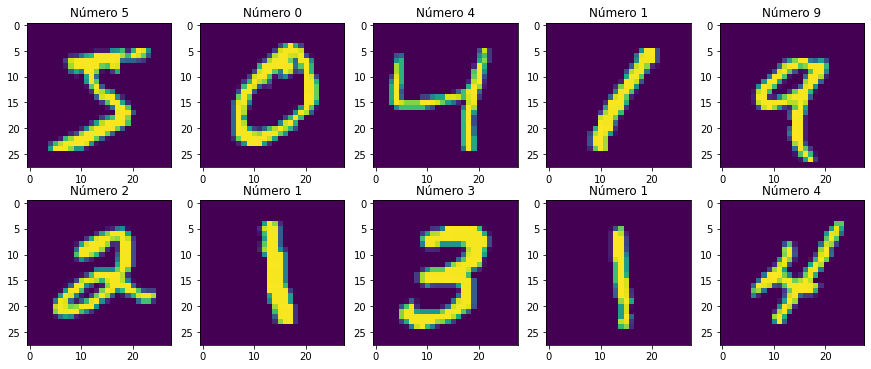

In [6]:
fig, axs = plt.subplots(2, 5,figsize=(15, 6))
# Plot something in each subplot
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i], label=f'Plot {i+1}')
    ax.set_title(f'Número {y_train[i]}')

plt.show()


Guardamos los datos en archivos csv. Por eficiencia en tiempo convertimos la matriz 3D a 2D y guardamos los datos mediante numpy

In [7]:
np.savetxt("shape_train.csv",x_train.shape, fmt="%.0f")
np.savetxt("shape_test.csv",x_test.shape, fmt="%.0f")
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
np.savetxt("x_train.csv",x_train, fmt="%.0f",delimiter=',')
np.savetxt("x_test.csv",x_test, fmt="%.0f",delimiter=',')
np.savetxt("y_train.csv",y_train, fmt="%.0f",delimiter=',')
np.savetxt("y_test.csv",y_test, fmt="%.0f",delimiter=',')